## 下载数据集

In [1]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import Sequential, layers

ds, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_ds, test_ds = ds['train'], ds['test']

BUFFER_SIZE, BATCH_SIZE = 10000, 64
train_ds = train_ds.shuffle(BUFFER_SIZE)
train_ds = train_ds.padded_batch(BATCH_SIZE, train_ds.output_shapes)
test_ds = test_ds.padded_batch(BATCH_SIZE, test_ds.output_shapes)

## 文本预处理

In [2]:
# geektutu.com
tokenizer = info.features['text'].encoder
print ('词汇个数:', tokenizer.vocab_size)

sample_str = 'welcome to geektutu.com'
tokenized_str = tokenizer.encode(sample_str)
print ('向量化文本:', tokenized_str)

for ts in tokenized_str:
    print (ts, '-->', tokenizer.decode([ts]))

词汇个数: 8185
向量化文本: [6351, 7961, 7, 703, 3108, 999, 999, 7975, 2449]
6351 --> welcome
7961 -->  
7 --> to 
703 --> ge
3108 --> ek
999 --> tu
999 --> tu
7975 --> .
2449 --> com


## 搭建 RNN 模型

In [ ]:
model = Sequential([
    layers.Embedding(tokenizer.vocab_size, 64),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history1 = model.fit(train_ds, epochs=10, validation_data=test_ds)
loss, acc = model.evaluate(test_ds)
print('准确率:', acc)

Epoch 1/10
     45/Unknown - 132s 3s/step - loss: 0.6927 - accuracy: 0.5083

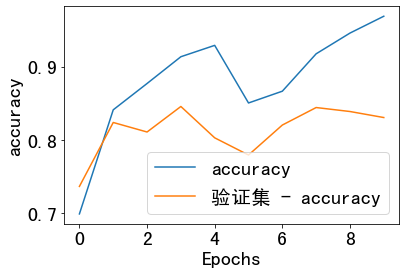

In [7]:
# geektutu.com
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20

def plot_graphs(history, name):
    plt.plot(history.history[name])
    plt.plot(history.history['val_'+ name])
    plt.xlabel("Epochs")
    plt.ylabel(name)
    plt.legend([name, '验证集 - ' + name])
    plt.show()

plot_graphs(history1, 'accuracy')

## 添加更多 LSTM 层

In [5]:
model = Sequential([
    layers.Embedding(tokenizer.vocab_size, 64),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=test_ds)
loss, acc = model.evaluate(test_ds)
print('准确率:', acc)

Epoch 1/10
391/391 [==============================] - 1811s 5s/step - loss: 0.5664 - accuracy: 0.6991 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 1513s 4s/step - loss: 0.3780 - accuracy: 0.8415 - val_loss: 0.4220 - val_accuracy: 0.8242
Epoch 3/10
391/391 [==============================] - 1461s 4s/step - loss: 0.3037 - accuracy: 0.8775 - val_loss: 0.4419 - val_accuracy: 0.8112
Epoch 4/10
391/391 [==============================] - 1450s 4s/step - loss: 0.2260 - accuracy: 0.9142 - val_loss: 0.4181 - val_accuracy: 0.8461
Epoch 5/10
391/391 [==============================] - 1434s 4s/step - loss: 0.1900 - accuracy: 0.9297 - val_loss: 0.4600 - val_accuracy: 0.8032
Epoch 6/10
391/391 [==============================] - 1436s 4s/step - loss: 0.3483 - accuracy: 0.8509 - val_loss: 0.4899 - val_accuracy: 0.7797
Epoch 7/10
391/391 [==============================] - 1425s 4s/step - loss: 0.3232 - accuracy: 0.8670 - val_loss: 0.4060 - val_a

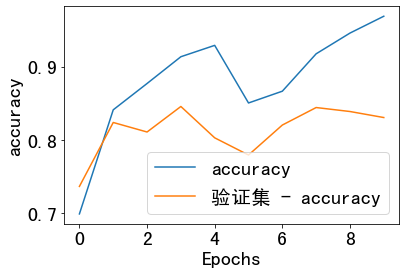

In [8]:
plot_graphs(history, 'accuracy')